In [1]:
import pandas as pd

In [3]:
housing = pd.read_csv('housing.csv')

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

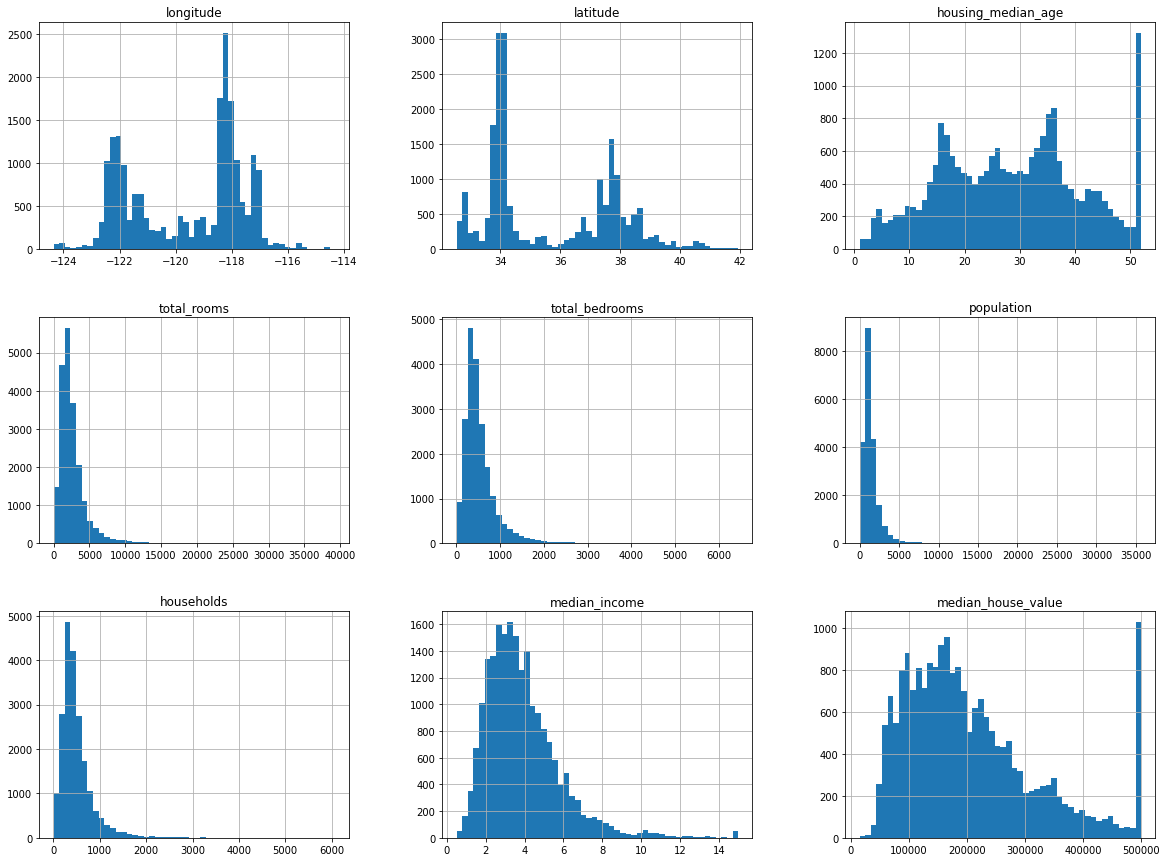

In [10]:
housing.hist(bins=50, figsize=(20, 15))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

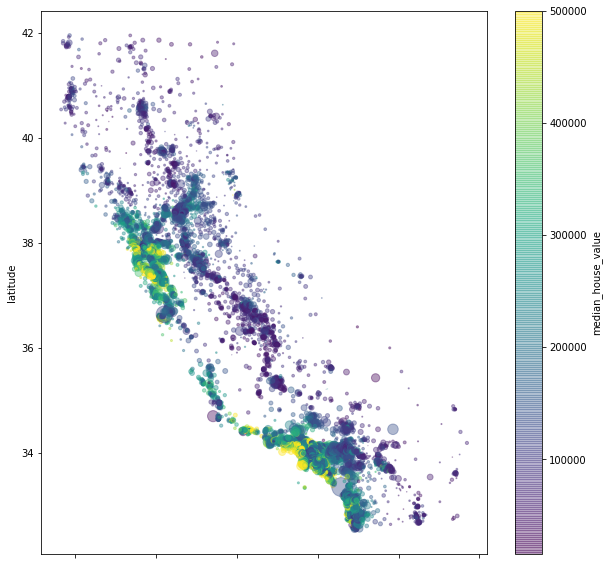

In [18]:
housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 10),
             c='median_house_value', cmap='viridis', alpha=0.4,
             s=housing['population']/100)

In [21]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(housing.drop(['ocean_proximity', 'total_bedrooms',
                                                                  'median_house_value'], axis=1),
                                                    housing['median_house_value'],
                                                    random_state=42)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mean_squared_error(y_test, pred, squared=False)

69715.8925172023

<AxesSubplot:>

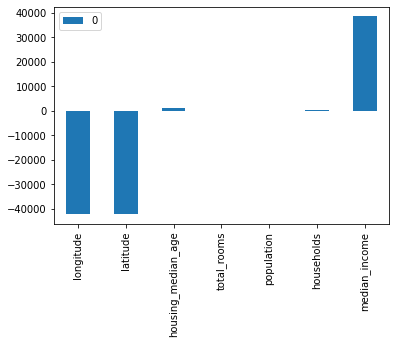

In [57]:
pd.DataFrame(lr.coef_, index=X_train.columns).plot(kind='bar')

# What to do with ocean_proximity?

In [59]:
housing.groupby('ocean_proximity').size()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
dtype: int64

In [60]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
cat_encoder = OneHotEncoder()

In [65]:
encoded = cat_encoder.fit_transform(housing[['ocean_proximity']])

In [67]:
encoded.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [72]:
housing_with_1hot = pd.concat([housing.drop('ocean_proximity', axis=1),
                               pd.DataFrame(encoded.toarray(), columns=cat_encoder.categories_)], axis=1)

In [73]:
housing_with_1hot

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,"(<1H OCEAN,)","(INLAND,)","(ISLAND,)","(NEAR BAY,)","(NEAR OCEAN,)"
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


# What to do with total_bedrooms?

In [76]:
median = housing_with_1hot['total_bedrooms'].median()
housing_with_1hot['total_bedrooms'].fillna(median, inplace=True)

# Now we can go back to modeling

In [78]:
X_train, X_test, y_train, y_test = train_test_split(housing_with_1hot.drop(['median_house_value'], axis=1),
                                                    housing_with_1hot['median_house_value'],
                                                    random_state=42)

In [79]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mean_squared_error(y_test, pred, squared=False)

69259.63067632183

# Whats next?

In [83]:
housing_with_1hot.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
(<1H OCEAN,)          0.256617
(NEAR BAY,)           0.160284
(NEAR OCEAN,)         0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
(ISLAND,)             0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
(INLAND,)            -0.484859
Name: median_house_value, dtype: float64

TODO:
- Add more features
- Try out Random Forest
- Cleanup